In [12]:
import zipfile
import os
import pandas as pd

# Path to your ZIP file
zip_file_path = "bank+marketing.zip"

# Step 1: Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files to a folder named "extracted_files"
    extract_path = "extracted_files"
    zip_ref.extractall(extract_path)

# Step 2: List extracted files
extracted_files = os.listdir(extract_path)
print("Extracted Files:", extracted_files)




Extracted Files: ['.ipynb_checkpoints', 'bank-additional.zip', 'bank.zip']


In [14]:
import numpy as np
df=pd.read_csv("bank.csv")
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [16]:
import pandas as pd

# Path to your CSV file
file_path = "bank.csv"

# Load the CSV file with the correct delimiter and quoting
data = pd.read_csv(file_path, sep=';', quotechar='"')

# Display the first few rows to confirm the data is loaded correctly
print(data.head())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [18]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [22]:
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1110   95]
 [  93   59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.38      0.39      0.39       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



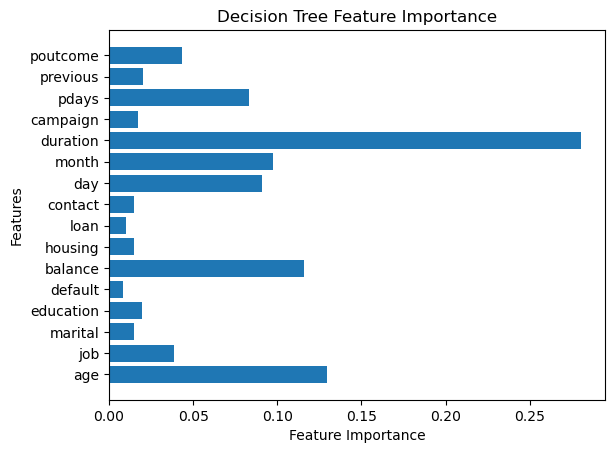

In [28]:
import matplotlib.pyplot as plt

importance = clf.feature_importances_
features = X.columns
plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree Feature Importance")
plt.show()